[[ 0  0  5 15 15  3  0  0]
 [ 0  0 11  7  4  7  0  0]
 [ 0  0 10  5  4  6  0  0]
 [ 0  0  4 16 15  1  0  0]
 [ 0  2 14 15 13  4  0  0]
 [ 1  5 12  0  2 12  0  0]
 [ 0  1 15  5  8 11  0  0]
 [ 0  0  8 15 14  4  1  0]]
[4 9 0 8 9]
[[ 0  0  5 15 15  3  0  0  0  0 11  7  4  7  0  0  0  0 10  5  4  6  0  0
   0  0  4 16 15  1  0  0  0  2 14 15 13  4  0  0  1  5 12  0  2 12  0  0
   0  1 15  5  8 11  0  0  0  0  8 15 14  4  1  0]]
[8]


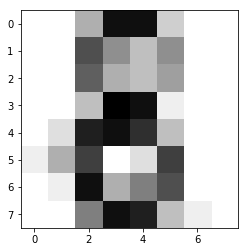

In [19]:
# 数字识别练习一 2019.2.28 

#import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

input_file = 'capture_num_w.jpg'# sys.argv[1]
img = cv2.imread(input_file) # 读入图像文件转成矩阵
#cv2.imshow('Original', img)
#cv2.waitKey()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 灰度化
#cv2.imshow('Input grayscale image', img_gray)
#cv2.waitKey()
img_scaled = cv2.resize(img_gray, (8, 8), interpolation=cv2.INTER_AREA) # 缩至8*8像素
#cv2.imshow('Skewed resizing', img_scaled)
#cv2.waitKey()

img_gray_scaled_8 = img_scaled // 15 # 256色减至16色
print(img_gray_scaled_8)

plt.imshow(img_gray_scaled_8, cmap='binary',extent=[0,7,0,7])

# 识别图像
from sklearn import datasets
digits = datasets.load_digits() # 导入数字数据集

from sklearn import svm #向量分析
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(digits.data[1:1790], digits.target[1:1790]) # 准备训练数据和测试数据
svm.SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, 
    gamma=0.01, kernel='rbf', max_iter=-1, probability=False, 
    random_state=None, shrinking=True, tol=0.001, verbose=False) #训练识别器
#print(svc.predict(digits.data[1791:1796])) # 预测值
print(digits.target[1791:1796]) # 原库值
test= img_gray_scaled_8.reshape(1, -1) # 预测对象要一维矩阵
print(test)
print(svc.predict(test)) # 预测结果的数字 

test = test.reshape(8, 8) #[8 * 8]
plt.imshow(test,cmap=plt.cm.gray_r,interpolation='nearest') # 画16色8*8灰度图像。


In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img=Image.open('capture.jpg')  #打开图像
gray=img.convert('L')   #转换成灰度
r,g,b=img.split()   #分离三通道
pic=Image.merge('RGB',(r,g,b)) #合并三通道
img_0 = np.array(img)
img_3 = img_0 // 3 # 255/3=85
gray_15 = np.array(gray)
gray_15 = gray_15 // 15
img_15 = img_0 //15 # 255/15~16


plt.figure("capture")
plt.subplot(2,3,1), plt.title('origin')
plt.imshow(img),plt.axis('off')

plt.subplot(2,3,2), plt.title('img_0')
plt.imshow(img_0),plt.axis('off')

plt.subplot(2,3,3), plt.title('img_3')
plt.imshow(img_3),plt.axis('off')

plt.subplot(2,3,4), plt.title('img_15')
plt.imshow(gray_15,cmap='binary'),plt.axis('off')

# plt.imshow(img_15,cmap=plt.cm.gray_r,interpolation='nearest') # 画16色8*8灰度图像。
plt.imshow(img_15,cmap='binary',interpolation='none',extent=[0,7,0,7]) # cmap='binary'灰，extent=8*8
plt.show()
#plt.imshow(img) # 显示jpg图像

plt.imshow(gray_15, cmap='binary',extent=[0,7,0,7])
print(gray_15)


[[11 12 11 ... 13 13 13]
 [11 11 11 ... 13 13 13]
 [11 11 11 ... 13 13 13]
 ...
 [ 0  0  0 ...  3  3  3]
 [ 0  0  0 ...  3  3  3]
 [ 0  0  0 ...  3  3  3]]


In [ ]:
# video_capture.py
# 10.2 从网络摄像头采集和处理图像信息
import cv2

# Initialize video capture object 初始化网络摄像头，第一个标记为0。
cap = cv2.VideoCapture(0)

# Define the image size scaling factor定义摄像头采集图像的比例系数
scaling_factor = 0.5

# Loop until you hit the Esc key启动无限循环采集帧，直至按下ESC键。
while True:
    # Capture the current frame从摄像头读取画面
    ret, frame = cap.read()
    #print(ret)
    # Resize the frame 调整帧大小，不是必须但在编写代码很重要。
    frame = cv2.resize(frame, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)

    # Display the image 显示帧
    cv2.imshow('Webcam', frame)

    # Detect if the Esc key has been pressed 侦测ESC键
    c = cv2.waitKey(1) # 等待1秒，然后采集下一帧。
    if c == 27:
        break
# save image 
while True:
    c = cv2.waitKey(1)
    if c == 27:
        output_file = 'capture_number.jpg'	# input_file[:-4] + '_cropped.jpg'		
        img_cropped = frame
        cv2.imwrite(output_file, img_cropped)
        break
   
    # Release the video capture object
cap.release()

# Close all active windows
cv2.destroyAllWindows()

In [1]:
# operating_on_images.py 调整图像尺寸，可以用其他方法。
# 9.2 用OpenCV-Python操作图像
import sys
import cv2
# https://www.lfd.uci.edu/~gohlke/pythonlibs/ 先下载，再安装
# https://www.cnblogs.com/mjk961/p/9129211.html 安装学习
# pip3 install opencv-python 安装命令
import numpy as np

# Load and display an image -- 'forest.jpg'

input_file = 'capture.jpg'# sys.argv[1]
img = cv2.imread(input_file)
cv2.imshow('Original', img)

# 仅在某一维调整
img_scaled = cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA)
cv2.imshow('Skewed resizing', img_scaled)
print(img_scaled.shape)
# Save an image保存图像
output_file = input_file[:-4] + '_scaled.jpg'
cv2.imwrite(output_file, img_scaled)

cv2.waitKey()


(8, 8, 3)


-1

In [8]:
# histogram_equalizer.py
# 9.4 直方图均衡化
import sys
import cv2
import numpy as np

# Load input image -- 'sunrise.jpg'
input_file = 'capture.jpg' # sys.argv[1]
img = cv2.IMREAD_GRAYSCALE(input_file) # imread(input_file)
print(img.shape)
# Convert it to grayscale 灰度
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('Input grayscale image', img_gray)
print(img_gray.shape)

TypeError: 'int' object is not callable

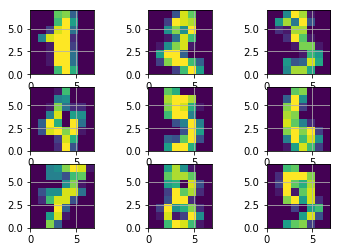

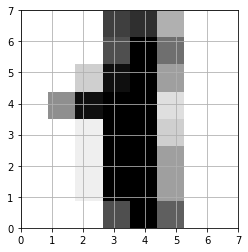

In [8]:
# 数据科学导论 6.1.6图像可视化 只对digits原库操作显示
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

for number in range(1,10):
    plt.subplot(3,3,number)
    plt.imshow(digits.images[number],interpolation='none',extent=[0,7,0,7]) # 0,8,0,8
    plt.grid()
plt.show()

plt.imshow(digits.images[1],interpolation='none',cmap='binary',extent=[0,7,0,7]) # cmap='binary'灰，extent=8*8
# Extent defines the images max and min of the horizontal and vertical valuse
plt.grid()
plt.show()



In [14]:
# visualize_characters.py
# 11.7 在光学字符识数据别库中将字符可视化
import os
import sys

import cv2
import numpy as np

# Load input data 
# http://ai.stanford.edu/~btaskar/ocr
input_file = 'letter.data' 

# Define visualization parameters 定义可视化参数
scaling_factor = 10
start_index = 6
end_index = -1
h, w = 16, 8

# Loop until you encounter the Esc key 循环至用户按下ESC键。用Tab分隔符将行分割成字符
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = np.array([255*float(x) for x in line.split('\t')[start_index:end_index]])
        # '\t'——按Tab键分割。
        # 数组调整为所需的形状。调整大小，展示
        img = np.reshape(data, (h,w))
        # reshape(数组，(行，列)) 改变维度。
        img_scaled = cv2.resize(img, None, fx=scaling_factor, fy=scaling_factor)
        cv2.imshow('Image', img_scaled)
        c = cv2.waitKey()
        if c == 27:    # 按下ESC终止循环
            break

In [1]:
# 灰度化
import cv2
import numpy as np
img2=cv2.imread('capture.jpg')
img2gray=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 85, 255, cv2.THRESH_BINARY)
cv2.imshow('image',img2gray)
cv2.waitKey(0)
cv2.destroyAllWindows()


[[178 182 180 ... 208 207 206]
 [176 179 178 ... 208 207 207]
 [177 179 178 ... 208 208 207]
 ...
 [  0   0   0 ...  58  59  59]
 [  0   0   0 ...  56  57  58]
 [  0   0   0 ...  56  57  58]]
240 320


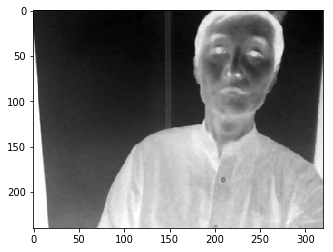

In [46]:
# edge_detector.py
# 9.3 检测边
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the input image -- 'chair.jpg'
# Convert it to grayscale 转换成灰度图
input_file = 'capture.jpg' # 'chair.jpg' #sys.argv[1]
img = cv2.imread(input_file, cv2.IMREAD_GRAYSCALE)
# 提取图像高，宽
h, w = img.shape
plt.imshow(img,cmap=plt.cm.gray,interpolation='nearest') # cmap.cm.gray_r 翻转成底片
plt.imshow(img,cmap=plt.cm.gray_r,interpolation='nearest') # 画16色8*8灰度图像。digits.images[1793]
print(img)
print(h, w)

In [52]:
# 图像jpg灰度化、改尺寸、矩阵化
#coding=utf-8
# 灰度化
from PIL import Image #需要下载并安装PIL（python的一个image图像处理库）

infile = 'capture.jpg' #原始图像路径
outfile= 'capture_1.jpg' #灰度化后的图像路径
im = Image.open(infile).convert('L') #灰度化
out = im.resize((8,8),Image.ANTIALIAS) #重新定义图片尺寸大小
out.show() 
out.save(outfile) #存储图片文件

# 矩阵化
"""
from skimage import io,transform
img_file2 = io.imread(outfile) # 只能读文件
print ("the picture's shape2 : ", img_file2.shape)
print(img_file2) 
"""
# np方法比skimage方法得到的矩阵点的值不一样。最后看用作预测效果如何。
import numpy as np
i = np.array(out)
print(i)



[[188 201 203 208 137  88 118 197]
 [177 197 199 205 128 120 121 187]
 [161 188 191 192 143 110 151 184]
 [147 182 184 191 150  85 168 171]
 [131 173 170 107  59  68 138 155]
 [110 166 106  31  28  46  62  84]
 [ 95 150  50  39  49  56  56  51]
 [ 80 117  20  33  38  42  39  46]]


[4 9 0 8 9]
[[ 0.  0.  6. 16. 13. 11.  1.  0.]
 [ 0.  0. 16. 15. 12. 16.  1.  0.]
 [ 0.  3. 16.  7.  0. 13.  6.  0.]
 [ 0.  4. 16.  0.  0. 10.  8.  0.]
 [ 0.  8. 16.  0.  0. 14.  6.  0.]
 [ 0.  5. 16.  7.  9. 16.  5.  0.]
 [ 0.  1. 15. 16. 16. 16.  1.  0.]
 [ 0.  0.  6. 16. 14.  6.  0.  0.]]
[0]
[ 0.  0.  6. 16. 13. 11.  1.  0.  0.  0. 16. 15. 12. 16.  1.  0.  0.  3.
 16.  7.  0. 13.  6.  0.  0.  4. 16.  0.  0. 10.  8.  0.  0.  8. 16.  0.
  0. 14.  6.  0.  0.  5. 16.  7.  9. 16.  5.  0.  0.  1. 15. 16. 16. 16.
  1.  0.  0.  0.  6. 16. 14.  6.  0.  0.]


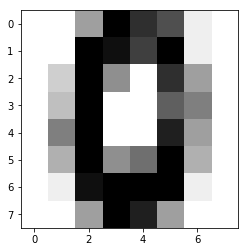

In [88]:
# 训练数字识别器，预测图像表示的数字
from sklearn import datasets
digits = datasets.load_digits()
# print(digits.DESCR)

import matplotlib.pyplot as plt
# plt.imshow(digits.images[1791],cmap=plt.cm.gray_r,interpolation='nearest')
# print(digits.data[1791].shape)
# print(digits.target)
# print(digits.target.size)
# print(digits.target[1791]) # 样本值
# print(digits.data[1791])
import numpy as np
x = np.array(digits.data[1791]) # (64,)
x= x.reshape(8,8) # 16度灰 0 -> 16: 白 -> 黑
# print(x)
# digits.data 是表示数字图像的64个数字，digits.target 是对应的一个数字
# 64个数字是由图像的8*8个16度灰度像素组成的。

from sklearn import svm #向量分析
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(digits.data[1:1790], digits.target[1:1790]) #训练估计器


svm.SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, 
    gamma=0.01, kernel='rbf', max_iter=-1, probability=False, 
    random_state=None, shrinking=True, tol=0.001, verbose=False)
#print(svc.predict(digits.data[1791:1796])) # 预测值
print(digits.target[1791:1796]) # 原库值

test = []
test.append(digits.data[1793]) # 根据data库里的数字造一个要求识别的数字的矩阵。
test = np.array(test)
print(test.reshape(8,8))
print(svc.predict(test)) # 预测结果的数字
print(digits.data[1793])
plt.imshow(digits.images[1793],cmap=plt.cm.gray_r,interpolation='nearest') # 画16色8*8灰度图像。



[4 9 0 8 9]
[[ 0.  0.  0. 14. 15. 13.  1.  0.  0.  0. 16. 15. 12. 16.  1.  0.  0.  3.
  16.  7.  0. 13.  6.  0.  0.  4. 16. 16. 16. 10.  8.  0.  0.  8. 16. 15.
   0. 14.  6.  0.  0.  5. 16.  7.  9. 16.  5.  0.  0.  1. 15. 16. 16. 16.
   1.  0.  0.  0.  6. 16. 14.  6.  0.  0.]]
[6]


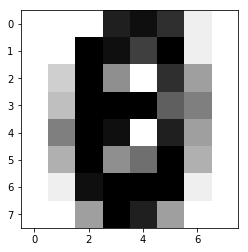

In [45]:
# 练习用--不能在看书笔记运行结果正确的单元中练习修改，容易引起错误而返不回去，而且参考书已经找不到了。
# 训练数字识别器，预测图像表示的数字
from sklearn import datasets
digits = datasets.load_digits()
# print(digits.DESCR)

import matplotlib.pyplot as plt
# plt.imshow(digits.images[1791],cmap=plt.cm.gray_r,interpolation='nearest')
# print(digits.data[1791].shape)
# print(digits.target)
# print(digits.target.size)
# print(digits.target[1791]) # 样本值
# print(digits.data[1791])
import numpy as np
x = np.array(digits.data[1791]) # (64,)
x= x.reshape(8,8) # 16度灰 0 -> 16: 白 -> 黑
# print(x)
# digits.data 是表示数字图像的64个数字，digits.target 是对应的一个数字
# 64个数字是由图像的8*8个16度灰度像素组成的。

from sklearn import svm #向量分析
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(digits.data[1:1790], digits.target[1:1790]) #训练估计器


svm.SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, 
    gamma=0.01, kernel='rbf', max_iter=-1, probability=False, 
    random_state=None, shrinking=True, tol=0.001, verbose=False)
#print(svc.predict(digits.data[1791:1796])) # 预测值
print(digits.target[1791:1796]) # 原库值

test= [[ 0. ,  0. ,  0. , 14. , 15. , 13. ,  1. ,  0. ,  0. ,  0. , 16. , 15. , 12. , 16. ,  1. ,  0. ,  0. ,  3. ,
  16. ,  7. ,  0. , 13. ,  6. ,  0. ,  0. ,  4. , 16. ,  16. ,  16. , 10. ,  8. ,  0. ,  0. ,  8. , 16. ,  15. ,
   0. , 14. ,  6. ,  0. ,  0. ,  5. , 16. ,  7. ,  9. , 16. ,  5. ,  0. ,  0. ,  1. , 15. , 16. , 16. , 16. ,
   1. ,  0. ,  0. ,  0. ,  6. , 16. , 14. ,  6. ,  0. ,  0. ]]
test = np.array(test)

#test = digits.data[1793] #[]
# test.append(digits.data[1793]) # 根据data库里的数字造一个要求识别的数字的矩阵。
# test = np.array(test) # [[...]]
print(test)
# test = test.reshape(1, -1) # [[...]] # OK
# "Reshape your data either using array.reshape(-1, 1)
# if your data has a single feature or array.reshape(1, -1) 
# if it contains a single sample."
# test = test.reshape(8, 8) #[8 * 8]
# print(test)
# print(digits.data[1793].reshape(8,8)) # 原始数据
# print(test.reshape(8,8)) # 测试用数据
print(svc.predict(test)) # 预测结果的数字 做出来的test可以显示图像，不能预测。
# print(digits.target[1793]) # 原始目标值 
test = test.reshape(8, 8) #[8 * 8]
plt.imshow(test,cmap=plt.cm.gray_r,interpolation='nearest') # 画16色8*8灰度图像。digits.images[1793]
#plt.imshow(test,cmap='binary',interpolation='none',extent=[0,7,0,7]) # cmap='binary'灰，extent=8*8

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

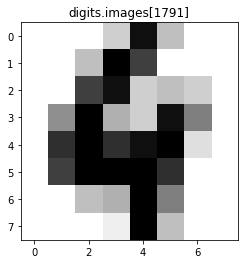

In [14]:
# 《Python 数据分析实战》
# 第11章 识别手体写数字
# 11.2 用 scikit-learn 识别手写体数字
# 11.3 Digits 数据集

from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.) # 定义估计器

from sklearn import datasets
digits = datasets.load_digits()
print(digits.DESCR) # 读取数据集自带的说明
digits.images[0] # 8*8 0-白，15-黑。

import matplotlib.pyplot as plt
%matplotlib inline
plt.title('digits.images[1791]')
plt.imshow(digits.images[1791], cmap=plt.cm.gray_r, interpolation='nearest')
digits.target
digits.target.size
 
svc.fit(digits.data[1:1790], digits.target[1:1790]) # 估计器学习，用svc的fit方法拟合digits的data和target
# 输出训练得到的估计器,在NoteBook上显示,会被以后的信息覆盖看不到。
"""
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
"""
print('predict: ', svc.predict(digits.data[1791:1796])) # 预测数据集的验证集的6个数字
print('target: ',digits.target[1791:1796]) # 与验证集各图像表示的数字对比

In [3]:
# 清晰化图像
# import cv2.cv2def
import cv2
def getImageVar(imgPath):
    image = cv2.imread(imgPath)
    img2gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imageVar = cv2.Laplacian(img2gray, cv2.CV_64F).var()
    return imageVar
def showfug(img):
    cv2.imshow('img',img)
    c = cv2.waitKey()
imgPath = 'capture_number.jpg'
# image = cv2.imread(imgPath)
# cv2.imshow('Image', image)
# showfug(imgPath)
image = getImageVar(imgPath)
# cv2.imshow('Image', image)
#c = cv2.waitKey()